In [1]:
from __future__ import print_function, division
from future.utils import iteritems
from builtins import range, input
# Note: you may need to update your version of future
# sudo pip install -U future
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.metrics.pairwise import pairwise_distances

In [2]:
def get_data(path):
    df = pd.read_excel(path,header=None)
    X = df.values
    return X

In [3]:
path = r"C:\Users\gprak\Downloads\BITS Courses\CS F464 Machine Learning I\data\data2.xlsx"
X=get_data(path)
X.shape

(150, 4)

In [4]:
def d(u,v):
    diff = u-v
    return diff.dot(diff)

def cost(X,R,M):
    cost=0
    for k in range(len(M)):
        diff= X-M[k]
        sq_distances = (diff*diff).sum(axis=1)
        cost+=(R[:,k]*sq_distances).sum()
    return cost

def plot_k_means(X,K,max_iter=20,beta=3.0,show_plots=False):
    N,D = X.shape
    exponents = np.empty((N,K))
#     M = np.zeros((K,D))
#     R = np.zeros((N,K))
    # random init
    initial_centers = np.random.choice(N,K,replace=False)
    M = X[initial_centers]
#     for k in range(K):
#         M[k]=X[np.random.choice(N)]
    costs = []
    k=0
    
    for i in range(max_iter):
        k+=1
        # calculate responsibilities
        for k in range(K):
            for n in range(N):
#                 R[n,k] = np.exp(-beta*d(M[k],X[n]))/np.sum(np.exp(-beta*d(M[j],X[n])) for j in range(K))
#                 print(np.exp(-beta*d(M[k],X[n])).shape)
#                 print(np.exp(-beta*d(M[k],X[n])))
#                 print(exponents[n,k])
                exponents[n,k]=np.exp(-beta*d(M[k],X[n]))
        R = exponents / exponents.sum(axis=1,keepdims=True)
        
        # recalc means
        M = R.T.dot(X)/R.sum(axis=0,keepdims=True).T
        
        c=cost(X,R,M)
        costs.append(c)
        if i>0:
            if np.abs(costs[-1]-costs[-2])<1e-5:break
    if show_plots:
        plt.plot(costs)
        plt.title("Costs")
        plt.show()
        
        random_colors = np.random.random((K,3))
        colors = R.dot(random_colors)
            
#         plt.scatter(X[:,0],X[:,1],X[:,2],c=colors)
        for idx1 in range(D):
            for idx2 in range(D):
                if idx1==idx2:
                    continue
                if idx1>idx2:
                    plt.scatter(X[:,idx1],X[:,idx2],c=colors)
                    plt.title(f"Showing feature-{idx1} vs feature-{idx2}")
                    plt.show()

       
    print(f"Final cost = {costs[-1]}")
    return M,R

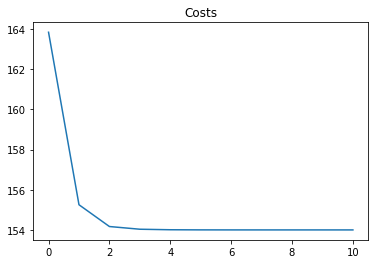

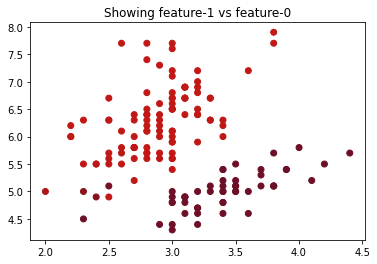

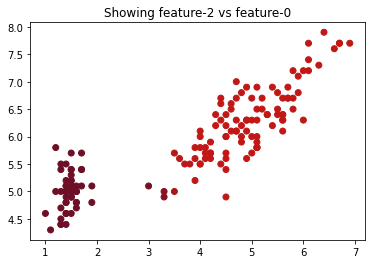

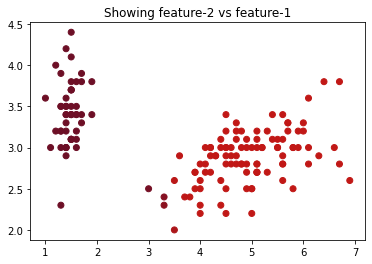

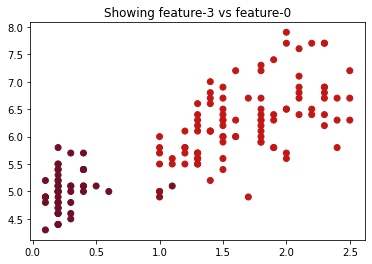

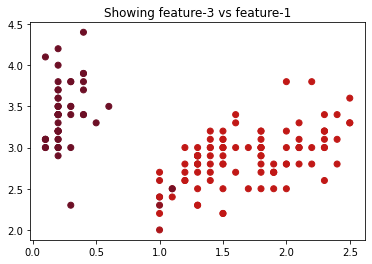

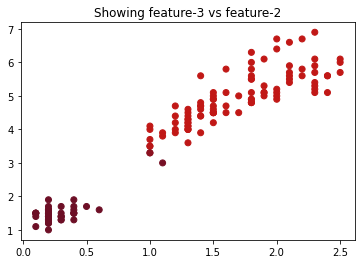

Final cost = 153.99914509012794


In [5]:
K=2
M,R = plot_k_means(X,K,beta = 1.0,show_plots=True)